In [ ]:
# @author - Nikhil Bambhroliya
# Lab - 2

In [1]:
#Handling Missing Value
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 


In [2]:
#Step 2 : Load Data
datasets = pd.read_csv('Exercise-CarData.csv')
print("Data:\n" ,datasets)
print("\nData Statistics \n" , datasets.describe())

Data:
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weight 

In [5]:
datasets['KM']=datasets['KM'].replace("??",np.nan)
datasets['HP']=datasets['HP'].replace("????",np.nan)
datasets['Doors']=datasets['Doors'].replace("three",'3')
datasets['Doors']=datasets['Doors'].replace("four",'4')
datasets['Doors']=datasets['Doors'].replace("five",'5')
datasets=datasets.astype({"Doors":int,"KM":float,"HP":float})
datasets.dropna(axis=0,how="all",inplace=True)
updated_dataset=datasets
updated_dataset['FuelType']=updated_dataset['FuelType'].fillna(updated_dataset['FuelType'].mode()[0])
updated_dataset['KM']=updated_dataset['KM'].fillna(updated_dataset['KM'].mean())
updated_dataset['Age']=updated_dataset['Age'].fillna(updated_dataset['Age'].mean())
updated_dataset['HP']=updated_dataset['HP'].fillna(updated_dataset['HP'].mean())
updated_dataset['MetColor']=updated_dataset['MetColor'].fillna(updated_dataset['MetColor'].mean())
print(datasets.info())
demo_dataset=datasets
temp_dataset=datasets


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   FuelType    1436 non-null   object 
 5   HP          1436 non-null   float64
 6   MetColor    1436 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   int32  
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 129.0+ KB
None


In [6]:
datasets

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986.000000,Diesel,90.0,1.000000,0,2000,3,1165
1,1,13750,23.000000,72937.000000,Diesel,90.0,1.000000,0,2000,3,1165
2,2,13950,24.000000,41711.000000,Diesel,90.0,0.674961,0,2000,3,1165
3,3,14950,26.000000,48000.000000,Diesel,90.0,0.000000,0,2000,3,1165
4,4,13750,30.000000,38500.000000,Diesel,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.000000,Petrol,86.0,1.000000,0,1300,3,1025
1432,1432,10845,72.000000,68647.239972,Petrol,86.0,0.000000,0,1300,3,1015
1433,1433,8500,55.672156,17016.000000,Petrol,86.0,0.000000,0,1300,3,1015
1434,1434,7250,70.000000,68647.239972,Petrol,86.0,1.000000,0,1300,3,1015


In [7]:
#Data Transformation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# print(demo_dataset)
X_new = (demo_dataset.loc[:, datasets.columns != 'FuelType'].values)
print("\n\nX for transformation : \n", X_new[:,1:])



X for transformation : 
 [[1.35000000e+04 2.30000000e+01 4.69860000e+04 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [1.37500000e+04 2.30000000e+01 7.29370000e+04 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [1.39500000e+04 2.40000000e+01 4.17110000e+04 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 ...
 [8.50000000e+03 5.56721557e+01 1.70160000e+04 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.25000000e+03 7.00000000e+01 6.86472400e+04 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [6.95000000e+03 7.60000000e+01 1.00000000e+00 ... 1.60000000e+03
  5.00000000e+00 1.11400000e+03]]


In [8]:
#Perform scaling on Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new[:,1:])
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.3250444  0.27848101 0.19335471 ... 1.         0.33333333 0.26829268]
 [0.3339254  0.27848101 0.30014938 ... 1.         0.33333333 0.26829268]
 [0.3410302  0.29113924 0.1716468  ... 1.         0.33333333 0.26829268]
 ...
 [0.14742451 0.6920526  0.07002086 ... 0.         0.33333333 0.02439024]
 [0.10301954 0.87341772 0.28249598 ... 0.         0.33333333 0.02439024]
 [0.09236234 0.94936709 0.         ... 0.42857143 1.         0.18536585]]


In [9]:
# Perform standardization on Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
std = StandardScaler()
X_std = std.fit_transform(X_new[:,1:])
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268 -1.82280225 -0.58347627 ...  2.31497633 -1.08513865
   1.75856113]
 [ 0.83271485 -1.82280225  0.11555078 ...  2.31497633 -1.08513865
   1.75856113]
 [ 0.88787659 -1.76701156 -0.72556589 ...  2.31497633 -1.08513865
   1.75856113]
 ...
 [-0.6152808   0.         -1.39076079 ... -1.42599356 -1.08513865
  -1.09191497]
 [-0.96004167  0.79936038  0.         ... -1.42599356 -1.08513865
  -1.09191497]
 [-1.04278428  1.13410455 -1.84908399 ...  0.17727925  1.014941
   0.78939926]]


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
X = demo_dataset.iloc[:, 1:].values 
#  Apply LabelEncoder on the data to convert FuelType names into numeric value
le = LabelEncoder()
X[ : ,3] = le.fit_transform(X[ : ,3])
print("\n\nInput : \n", X) 



Input : 
 [[13500 23.0 46986.0 ... 2000 3 1165]
 [13750 23.0 72937.0 ... 2000 3 1165]
 [13950 24.0 41711.0 ... 2000 3 1165]
 ...
 [8500 55.67215568862275 17016.0 ... 1300 3 1015]
 [7250 70.0 68647.23997185081 ... 1300 3 1015]
 [6950 76.0 1.0 ... 1600 5 1114]]


In [11]:
# Use dummy variables from pandas library to create one column for each FuelType

dummy = pd.get_dummies(demo_dataset['FuelType'])
print("\n\nDummy :\n",dummy)
demo_dataset = demo_dataset.drop(['FuelType','Unnamed: 0'],axis=1)
demo_dataset = pd.concat([dummy,demo_dataset],axis=1)
print("\n\nFinal Data :\n",demo_dataset)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       1
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Price        Age            KM     HP  MetColor  \
0       0       1       0  13500  23.000000  46986.000000   90.0  1.000000   
1       0       1       0  13750  23.000000  72937.000000   90.0  1.000000   
2       0       1       0  13950  24.000000  41711.000000   90.0  0.674961   
3       0       1       0  14950  26.000000  48000.000000   90.0  0.000000   
4       0       1       0  13750  30.000000  38500.000000   90.0  0.000000   
...   ...     ...     ...    ...        ...           ...    ...       ...   
1431    0       0       1   7500  55.672156  20544.000000   86.0  1.000000   
1432    0   

In [14]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(temp_dataset.FuelType.values.reshape(-1,1)).toarray()
print(x)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [15]:
dfOneHot = pd.DataFrame(x, columns = ["FuelType_"+str(int(i)) for i in range(3)]) 
df = pd.concat([temp_dataset, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['FuelType','Unnamed: 0'], axis=1) 
#printing to verify 
# print(temp_dataset.shape)
print(df.head())

   Price   Age       KM    HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500  23.0  46986.0  90.0  1.000000          0  2000      3    1165   
1  13750  23.0  72937.0  90.0  1.000000          0  2000      3    1165   
2  13950  24.0  41711.0  90.0  0.674961          0  2000      3    1165   
3  14950  26.0  48000.0  90.0  0.000000          0  2000      3    1165   
4  13750  30.0  38500.0  90.0  0.000000          0  2000      3    1170   

   FuelType_0  FuelType_1  FuelType_2  
0         0.0         1.0         0.0  
1         0.0         1.0         0.0  
2         0.0         1.0         0.0  
3         0.0         1.0         0.0  
4         0.0         1.0         0.0  


In [16]:
import seaborn as sns
temp_dataset= temp_dataset.drop(['Unnamed: 0'], axis=1)
temp_dataset.head()


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.000000,0,2000,3,1165
1,13750,23.0,72937.0,Diesel,90.0,1.000000,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,0.674961,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.000000,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.000000,0,2000,3,1170


In [17]:
corr = temp_dataset.corr()
corr.head(13)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.845111,-0.565016,0.308414,0.107943,0.033081,0.165067,0.185326,0.581198
Age,-0.845111,1.000000,0.495199,-0.152946,-0.091331,0.030931,-0.116255,-0.151785,-0.442055
KM,-0.565016,0.495199,1.000000,-0.332984,-0.088587,-0.080743,0.296281,-0.036021,-0.025758
HP,0.308414,-0.152946,-0.332984,1.000000,0.060990,0.013753,0.053466,0.096938,0.086214
MetColor,0.107943,-0.091331,-0.088587,0.060990,1.000000,-0.013167,0.027524,0.081540,0.054952
Automatic,0.033081,0.030931,-0.080743,0.013753,-0.013167,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.116255,0.296281,0.053466,0.027524,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.151785,-0.036021,0.096938,0.081540,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.442055,-0.025758,0.086214,0.054952,0.057249,0.651450,0.302618,1.000000


<AxesSubplot:>

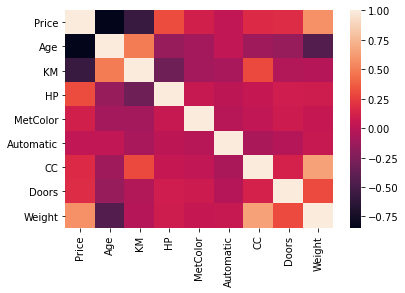

In [18]:
sns.heatmap(corr)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


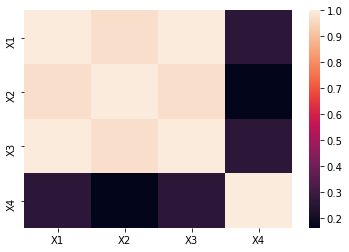

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv('Data_for_Correlation.csv')
data = data.iloc[:,:-1]
data.head()
corr = data.corr()
corr.head()
sns.heatmap(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
selected_columns.shape
data = data[selected_columns]
print(data)